<a href="https://colab.research.google.com/github/olgaselesnjova/Megafon/blob/main/Megafon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Команда: Облико Морале (команда №9)

Сводная таблица: https://docs.google.com/spreadsheets/d/1U3JEgtKUyOVli24KuXplv7SS3z6QnUxcosdLpBZ8OAI/edit#gid=0

In [2]:
# Импорт из гитхаба 
! git clone https://github.com/olgaselesnjova/Megafon.git   

Cloning into 'Megafon'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 87 (delta 36), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (87/87), 260.89 MiB | 4.28 MiB/s, done.
Updating files: 100% (75/75), done.


In [ ]:
# Импорт из G-drive 
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

In [ ]:
data_dir = "/gdrive/My Drive/Megafon/Graphs+tables/"     

In [ ]:
cities_2021 = []
cities_2022 = []

#directory_2021 = "/gdrive/My Drive/Megafon/Data_2021/" 
directory_2021 =  '/content/Megafon/data_2021'
#directory_2022 = "/gdrive/My Drive/Megafon/Data_2022/"
directory_2022 = '/content/Megafon/data_2022'

def dfs_names(directory):
  for filename in sorted(os.listdir(directory)):
      if 'csv' in filename:
        name = filename[:-9]
        name = name[9:]
        if '2021' in filename:
          cities_2021.append(name)
        else:
          cities_2022.append(name)

dfs_names(directory_2021)
dfs_names(directory_2022)
#cities_2022

In [ ]:
def to_correct_time(df):
    tot_rows = df.shape[0]
    for date_cell in range(0,tot_rows): 
        date_str = df.iloc[date_cell,0]
        date_format = '%Y.%m.%d'   #'%d.%m.%Y %H:%M'
        date_obj = datetime.strptime(date_str, date_format)
        df.iloc[date_cell,0] = date_obj

In [ ]:
# Merge all dfs by year 2021
# Для реальных туристов df_real_tourists_2021
"""
df_merged_2021 = pd.DataFrame()
for filename in sorted(os.listdir(directory_2021)):
  if 'csv' in filename:
    df_temp = pd.read_csv(f'{directory_2021}/{filename}')
    df_merged_2021 = df_merged_2021.append(df_temp, ignore_index=True)"""

"\ndf_merged_2021 = pd.DataFrame()\nfor filename in sorted(os.listdir(directory_2021)):\n  if 'csv' in filename:\n    df_temp = pd.read_csv(f'{directory_2021}/{filename}')\n    df_merged_2021 = df_merged_2021.append(df_temp, ignore_index=True)"

In [ ]:
d_2021 = {}
d_2022 = {}

def creating_dfs(directory):
  for filename in sorted(os.listdir(directory)):
    if 'csv' in filename:
      path = f'{directory}/{filename}'
      data = pd.read_csv(path, sep = ',', decimal = ',', index_col = 0)
      df = pd.DataFrame(data)
      #to_correct_time(df)
      name = path.split('/Tourists_')[-1][:-9]

      if '2021' in filename:
        for i in cities_2021:
          if i == name:
            d_2021[i] = df
      else:
        for k in cities_2022:
          if k == name:
            d_2022[k] = df

creating_dfs(directory_2021)
creating_dfs(directory_2022)

In [ ]:
total_unique_users_2021 = []
total_unique_users_2022 = []

#ids_fake_tourists_2021 = {}
#ids_fake_tourists_2022 = {}

fake_tourists_2021 = {}
fake_tourists_2022 = {}

count_fake_tourists_2021 = []     
count_fake_tourists_2022 = []

real_tourists_2021 = {}
real_tourists_2022 = {}

count_real_tourists_2021 = []
count_real_tourists_2022 = []

def users(cities, year, d):  
  for i in cities:
    df = d[i]

    df['month']  = pd.DatetimeIndex(df['snap_date']).month
    total_unique_users = df["id_hash"].nunique()
    fake_tourists = (df.loc[~df['days'].between(5, 20)]).reset_index().sort_values("days", ascending=False)

    fake_tourists_count = fake_tourists.groupby(["month"])['id_hash'].nunique().sum()  
    #fake_tourists_count = fake_tourists.shape[0]

    real_tourists = (df.loc[df['days'].between(5, 20)]).reset_index().sort_values("days", ascending=False)
    real_tourists_count = real_tourists.groupby(["month"])['id_hash'].nunique().sum()  
    #real_tourists_count = real_tourists.shape[0]
    
    if year == '2021':
      total_unique_users_2021.append(total_unique_users)                       
      count_real_tourists_2021.append(real_tourists_count)    
      real_tourists_2021[i] = real_tourists 

      count_fake_tourists_2021.append(fake_tourists_count)
      fake_tourists_2021[i] = fake_tourists 
      #ids_fake_tourists_2021[i] = fake_tourists['id_hash'].tolist() 
         
    else:
      total_unique_users_2022.append(total_unique_users)
      count_real_tourists_2022.append(real_tourists_count) 
      real_tourists_2022[i] = real_tourists

      count_fake_tourists_2022.append(fake_tourists_count) 
      fake_tourists_2022[i] = fake_tourists 
      #ids_fake_tourists_2022[i] = fake_tourists['id_hash'].tolist()

users(cities_2021, "2021", d_2021)
users(cities_2022, "2022", d_2022)

In [ ]:
df_2021 = pd.DataFrame({'Города': cities_2021, 'Всего 2021': total_unique_users_2021})
df_2022 = pd.DataFrame({'Города': cities_2022, 'Всего 2022': total_unique_users_2022})
label = ['Всего 2021', 'Всего 2022']
df_total_unique_users = pd.merge(df_2021, df_2022, on='Города').sort_values(by = label)
"""ax = df_total_unique_users.plot(x='Города', y=label, kind="bar", figsize=(20,10))
plt.xlabel("Города")
plt.xticks(rotation=45)
plt.ylabel("Кол-во пользователей")
plt.title("Кол-во уникальных пользователей в каждом городе")
plt.grid()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=90, fontsize=10, padding=3)
plt.savefig(f"{data_dir}Кол-во уникальных пользователей в каждом городе.jpg")
plt.show()"""
# Добавить цифры - лейблы 
# Круто бы показать прирост 

'ax = df_total_unique_users.plot(x=\'Города\', y=label, kind="bar", figsize=(20,10))\nplt.xlabel("Города")\nplt.xticks(rotation=45)\nplt.ylabel("Кол-во пользователей")\nplt.title("Кол-во уникальных пользователей в каждом городе")\nplt.grid()\nfor container in ax.containers:\n    ax.bar_label(container, label_type=\'edge\', color=\'black\', rotation=90, fontsize=10, padding=3)\nplt.savefig(f"{data_dir}Кол-во уникальных пользователей в каждом городе.jpg")\nplt.show()'

In [ ]:
df_total_unique_users.to_csv((f"{data_dir}Кол-во уникальных пользователей в каждом городе.xlsx"))
df_total_unique_users.head()

,Города,Всего 2021,Всего 2022
20,Меленки,5988,7772
13,Кольчугино,6677,9227
35,Юрьев-Польский,8289,12985
7,Городищи,18654,20438
34,Хадыженск,18908,25703


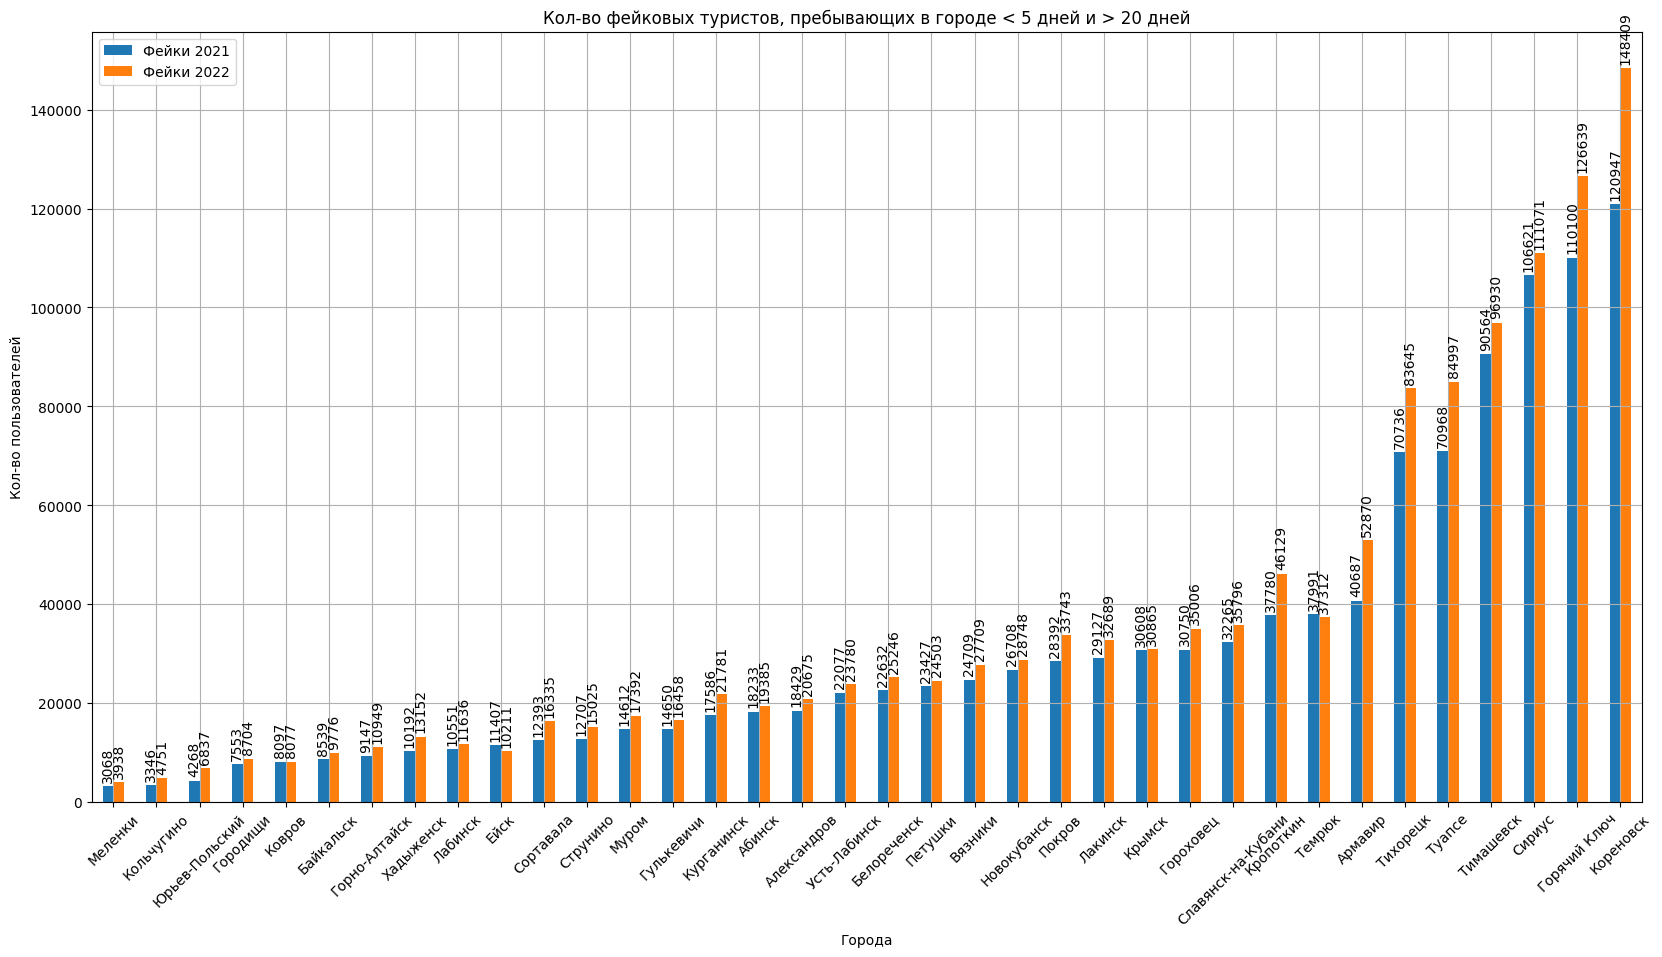

In [ ]:
df_fake_2021 = pd.DataFrame({'Города': cities_2021, 'Фейки 2021': count_fake_tourists_2021})
df_fake_2022 = pd.DataFrame({'Города': cities_2022, 'Фейки 2022': count_fake_tourists_2022})
label = ['Фейки 2021', 'Фейки 2022']
df_fake_users = pd.merge(df_fake_2021, df_fake_2022, on='Города').sort_values(by = label)
ax = df_fake_users.plot(x='Города', y=label, kind="bar", figsize=(20,10))
plt.xlabel("Города")
plt.xticks(rotation=45)
plt.ylabel("Кол-во пользователей")
plt.title("Кол-во фейковых туристов, пребывающих в городе < 5 дней и > 20 дней")
plt.grid()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=90, fontsize=10, padding=3)
plt.savefig(f"{data_dir}Кол-во фейковых туристов, пребывающих в городе < 5 дней и > 20 дней.jpg")
plt.show()

# Круто бы показать прирост 

In [ ]:
df_fake_users.to_csv((f"{data_dir}Кол-во фейковых туристов, пребывающих в городе < 5 дней и > 20 дней.xlsx"))
df_fake_users.head()

,Города,Фейки 2021,Фейки 2022
20,Меленки,3068,3938
13,Кольчугино,3346,4751
35,Юрьев-Польский,4268,6837
7,Городищи,7553,8704
12,Ковров,8097,8077


In [ ]:
# Построить процент фейковых юзеров к туристам (пай чарт)
"""df_fake_users = pd.merge(df_fake_2021, df_fake_2022, on='Города')
df_total_ratio_fakes = pd.merge(df_total_unique_users, df_fake_users, on='Города')

df_total_ratio_fakes_2021 = df_total_ratio_fakes[['Города', 'Всего 2021', 'Фейки 2021']]
df_total_ratio_fakes_2021_T = df_total_ratio_fakes_2021.T
df_total_ratio_fakes_2021_T.columns = df_total_ratio_fakes_2021_T.iloc[0]
df_total_ratio_fakes_2021_T = df_total_ratio_fakes_2021_T.drop(labels = 'Города', axis = 0)

df_total_ratio_fakes_2022 = df_total_ratio_fakes[['Города', 'Всего 2022', 'Фейки 2022']]
df_total_ratio_fakes_2022_T = df_total_ratio_fakes_2022.T
df_total_ratio_fakes_2022_T.columns = df_total_ratio_fakes_2022_T.iloc[0]
df_total_ratio_fakes_2022_T = df_total_ratio_fakes_2022_T.drop(labels = 'Города', axis = 0)"""

"df_fake_users = pd.merge(df_fake_2021, df_fake_2022, on='Города')\ndf_total_ratio_fakes = pd.merge(df_total_unique_users, df_fake_users, on='Города')\n\ndf_total_ratio_fakes_2021 = df_total_ratio_fakes[['Города', 'Всего 2021', 'Фейки 2021']]\ndf_total_ratio_fakes_2021_T = df_total_ratio_fakes_2021.T\ndf_total_ratio_fakes_2021_T.columns = df_total_ratio_fakes_2021_T.iloc[0]\ndf_total_ratio_fakes_2021_T = df_total_ratio_fakes_2021_T.drop(labels = 'Города', axis = 0)\n\ndf_total_ratio_fakes_2022 = df_total_ratio_fakes[['Города', 'Всего 2022', 'Фейки 2022']]\ndf_total_ratio_fakes_2022_T = df_total_ratio_fakes_2022.T\ndf_total_ratio_fakes_2022_T.columns = df_total_ratio_fakes_2022_T.iloc[0]\ndf_total_ratio_fakes_2022_T = df_total_ratio_fakes_2022_T.drop(labels = 'Города', axis = 0)"

In [ ]:
#df_total_ratio_fakes_2021_T

In [ ]:
# Изменить на 2022 (ctrl+shift+l)
"""df_total_ratio_fakes_2022["Доля фейков"] = round((df_total_ratio_fakes_2022["Фейки 2022"] / df_total_ratio_fakes_2022["Всего 2022"])*100, 1)
df_total_ratio_fakes_2022_sorted = df_total_ratio_fakes_2022.sort_values(by = "Доля фейков", axis = 0, ascending = False)"""

In [ ]:
"""df_total_ratio_fakes_2022_sorted.to_csv((f"{data_dir}Доли фейковых туристов в городах в 2022.xlsx"))
df_total_ratio_fakes_2022_sorted.head()"""

'df_total_ratio_fakes_2022_sorted.to_csv((f"{data_dir}Доли фейковых туристов в городах в 2022.xlsx"))\ndf_total_ratio_fakes_2022_sorted.head()'

In [ ]:
# Изменить на 2022 (ctrl+shift+l)
"""for_top_ratio_plot = df_total_ratio_fakes_2022_sorted.iloc[:4, 0:3].T
for_top_ratio_plot.columns = for_top_ratio_plot.iloc[0]
for_top_ratio_plot = for_top_ratio_plot.drop(labels = 'Города', axis = 0)
for_top_ratio_plot.plot.pie(subplots=True, figsize=(20, 20), autopct='%1.0f%%')
plt.savefig(f"{data_dir}Топ доли фейковых туристов к общему кол-ву пользователей за 2022.jpg")"""

'for_top_ratio_plot = df_total_ratio_fakes_2022_sorted.iloc[:4, 0:3].T\nfor_top_ratio_plot.columns = for_top_ratio_plot.iloc[0]\nfor_top_ratio_plot = for_top_ratio_plot.drop(labels = \'Города\', axis = 0)\nfor_top_ratio_plot.plot.pie(subplots=True, figsize=(20, 20), autopct=\'%1.0f%%\')\nplt.savefig(f"{data_dir}Топ доли фейковых туристов к общему кол-ву пользователей за 2022.jpg")'

In [ ]:
"""df_total_ratio_fakes_2021["Кол-во реальных туристов 2021"] = df_total_ratio_fakes_2021["Всего 2021"] - df_total_ratio_fakes_2021["Фейки 2021"]
df_real_2021 = df_total_ratio_fakes_2021[['Города', "Кол-во реальных туристов 2021"]]

df_total_ratio_fakes_2022["Кол-во реальных туристов 2022"] = df_total_ratio_fakes_2022["Всего 2022"] - df_total_ratio_fakes_2022["Фейки 2022"]
df_real_2022 = df_total_ratio_fakes_2022[['Города', "Кол-во реальных туристов 2022"]]

df_total_real_tourists = pd.merge(df_real_2021, df_real_2022, on='Города')

label = ['Кол-во реальных туристов 2021', 'Кол-во реальных туристов 2022']
ax = df_total_real_tourists.plot(x='Города', y=label, kind="bar", figsize=(20,10))
plt.xlabel("Города")
plt.xticks(rotation=45)
plt.ylabel("Кол-во туристов")
plt.title("Кол-во реальных туристов")
plt.grid()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=90, fontsize=10, padding=3)
plt.savefig(f"{data_dir}Кол-во реальных туристов.jpg")
plt.show()"""

'df_total_ratio_fakes_2021["Кол-во реальных туристов 2021"] = df_total_ratio_fakes_2021["Всего 2021"] - df_total_ratio_fakes_2021["Фейки 2021"]\ndf_real_2021 = df_total_ratio_fakes_2021[[\'Города\', "Кол-во реальных туристов 2021"]]\n\ndf_total_ratio_fakes_2022["Кол-во реальных туристов 2022"] = df_total_ratio_fakes_2022["Всего 2022"] - df_total_ratio_fakes_2022["Фейки 2022"]\ndf_real_2022 = df_total_ratio_fakes_2022[[\'Города\', "Кол-во реальных туристов 2022"]]\n\ndf_total_real_tourists = pd.merge(df_real_2021, df_real_2022, on=\'Города\')\n\nlabel = [\'Кол-во реальных туристов 2021\', \'Кол-во реальных туристов 2022\']\nax = df_total_real_tourists.plot(x=\'Города\', y=label, kind="bar", figsize=(20,10))\nplt.xlabel("Города")\nplt.xticks(rotation=45)\nplt.ylabel("Кол-во туристов")\nplt.title("Кол-во реальных туристов")\nplt.grid()\nfor container in ax.containers:\n    ax.bar_label(container, label_type=\'edge\', color=\'black\', rotation=90, fontsize=10, padding=3)\nplt.savefig(f"{da

In [ ]:
df_real_2021 = pd.DataFrame({'Города': cities_2021, '2021': count_real_tourists_2021})
df_real_2022 = pd.DataFrame({'Города': cities_2022, '2022': count_real_tourists_2022})

label = ['2021', '2022']
df_total = pd.merge(df_real_2021, df_real_2022, on='Города').sort_values(by = label)

df_total.to_csv((f"{data_dir}Кол-во реальных туристов в каждом городе.xlsx"))

df_total_real_tourists = pd.merge(df_real_2021, df_real_2022, on='Города')

df_total_real_tourists.to_csv((f"{data_dir}Кол-во реальных туристов.xlsx"))
df_total_real_tourists.head()

,Города,2021,2022
0,Абинск,30226,38386
1,Александров,25139,29440
2,Армавир,52268,66495
3,Байкальск,26819,31119
4,Белореченск,24245,26740


In [ ]:
avg_user_stay_2021 = []
avg_user_stay_2022 = []

df_real_tourists_2021 = {}
df_real_tourists_2022 = {}

def avg_user_stay(cities, year, d, fakes):
  for i in cities:
    df = d[i]
    avg = int(df['days'].mean())
    
    if year == '2021':
      avg_user_stay_2021.append(avg)
    else:
      avg_user_stay_2022.append(avg)

avg_user_stay(cities_2021, '2021', d_2021, real_tourists_2021)
avg_user_stay(cities_2022, '2022', d_2022, real_tourists_2022)

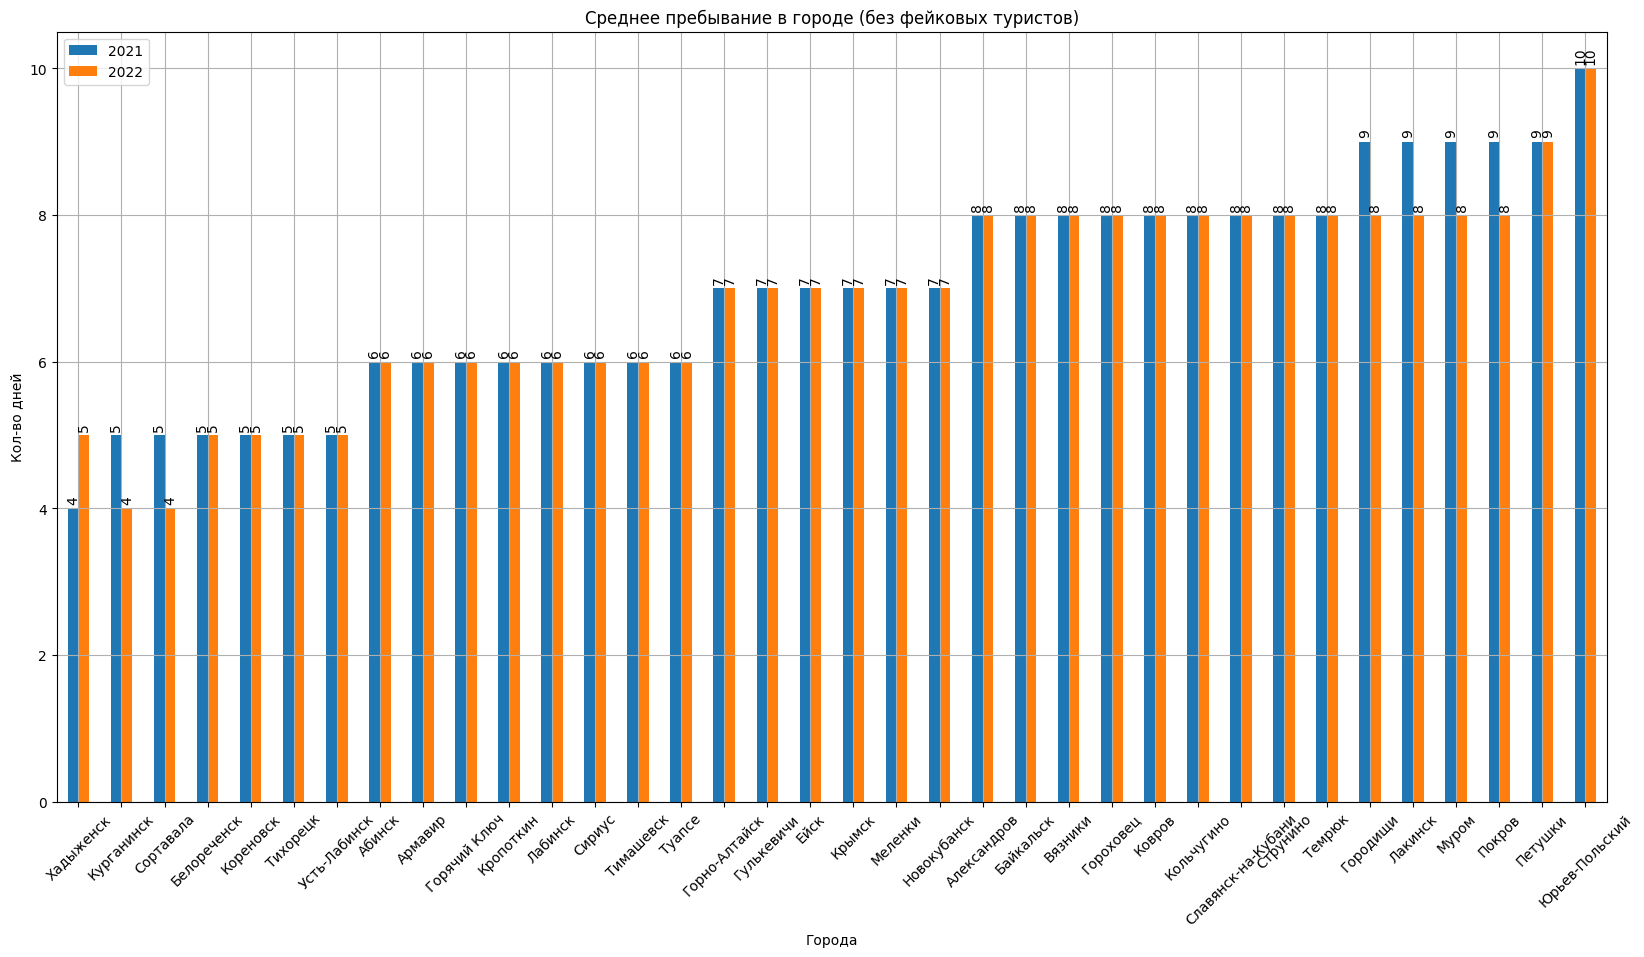

In [ ]:
df_avg_stay_2021 = pd.DataFrame({'Города': cities_2021, '2021': avg_user_stay_2021})
df_avg_stay_2022 = pd.DataFrame({'Города': cities_2022, '2022': avg_user_stay_2022})
label = ['2021', '2022']
df_avg_stay = pd.merge(df_avg_stay_2021, df_avg_stay_2022, on='Города').sort_values(by = label)
ax = df_avg_stay.plot(x='Города', y=label, kind="bar", figsize=(20,10))
plt.xlabel("Города")
plt.xticks(rotation=45)
plt.ylabel("Кол-во дней")
plt.title("Среднее пребывание в городе (без фейковых туристов)")
plt.grid()
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', rotation=90, fontsize=10, padding=3)
plt.savefig(f"{data_dir}Среднее пребывание в городе (без фейковых туристов).jpg")
plt.show()

# Добавить цифры - лейблы 
# Круто бы показать прирост 

In [ ]:
df_avg_stay.to_csv((f"{data_dir}Среднее пребывание в городе (без фейковых туристов).xlsx"))
df_avg_stay.head()

,Города,2021,2022
34,Хадыженск,4,5
17,Курганинск,5,4
27,Сортавала,5,4
4,Белореченск,5,5
14,Кореновск,5,5


In [ ]:
# Сгруппировать по месяцам и среднее кол-во дней пребывания 
monthly_count_2021 = {}
monthly_count_2022 = {}

def active_months(d, year, cities):
  for i in cities:
    df = d[i]
    df['month']  = pd.DatetimeIndex(df['snap_date']).month
    monthly_count_days = df.groupby(["month"])['days'].mean().astype(int)

    if year == '2021':
      monthly_count_2021[i] = monthly_count_days
    else:
      monthly_count_2022[i] = monthly_count_days

active_months(real_tourists_2021, "2021", cities_2021)
active_months(real_tourists_2022, "2022", cities_2022)

In [ ]:
df_month_2021 = pd.DataFrame(columns=['month']) 

for i in cities_2021:
  df_monthly_count_2021 = pd.DataFrame({f'2021 {i}': monthly_count_2021[f"{i}"]})
  df_month_2021 = df_month_2021.merge(df_monthly_count_2021, on='month', how='outer') 
df_month_2021['Срд.кол-во дней в мес. 2021'] = df_month_2021.iloc[:,1:3].mean(axis=1).astype(int)
df_month_2021 = df_month_2021.T
df_month_2021.to_csv((f"{data_dir}Среднее ежемесячное кол-во туристических дней по городам за 2021.xlsx"))

In [ ]:
df_month_2022 = pd.DataFrame(columns=['month']) 

for i in cities_2022:
  df_monthly_count_2022 = pd.DataFrame({f'2022 {i}': monthly_count_2022[f"{i}"]})
  df_month_2022 = df_month_2022.merge(df_monthly_count_2022, on='month', how='outer') 
df_month_2022['Срд.кол-во дней в мес. 2022'] = df_month_2022.iloc[:,1:3].mean(axis=1).astype(int)
df_month_2022 = df_month_2022.T
df_month_2022.to_csv((f"{data_dir}Среднее ежемесячное кол-во туристических дней по городам за 2022.xlsx"))

In [ ]:
df_month_2021

,0,1,2,3,4,5,6,7,8,9,10,11
month,1,2,3,4,5,6,7,8,9,10,11,12
2021 Абинск,9,9,9,8,8,9,9,9,8,9,9,8
2021 Александров,10,10,10,10,10,10,10,10,10,10,10,10
2021 Армавир,9,9,9,9,9,9,9,9,9,9,10,9
2021 Байкальск,8,9,9,9,9,9,9,9,9,9,9,9
2021 Белореченск,9,9,8,8,8,8,8,8,8,9,9,9
2021 Вязники,10,10,10,10,10,10,10,10,10,10,10,10
2021 Горно-Алтайск,8,9,8,8,7,8,7,7,7,8,9,9
2021 Городищи,10,10,10,10,10,10,10,10,10,10,10,10
2021 Гороховец,10,10,10,10,10,10,10,10,10,10,10,9


In [ ]:
# ежемесячное кол-во реальных туристов 
count_montly_users_2021 = {}
count_montly_users_2022 = {}

def monthly_users(cities, year, d):  
  for i in cities:
    df = d[i]
    
    #df['month']  = pd.DatetimeIndex(df['snap_date']).month
    new_df = df[['month', 'id_hash']]
    new_df = new_df.groupby(["month"])['id_hash'].count()  #.nunique()
    new_df = pd.DataFrame(new_df)
    new_df = new_df.T
    new_df = new_df.rename({'id_hash': f'{i}'})

    if year == '2021':
      count_montly_users_2021[i] = new_df
    else:
      count_montly_users_2022[i] = new_df

monthly_users(cities_2021, "2021", real_tourists_2021)
monthly_users(cities_2022, "2022", real_tourists_2022)

In [ ]:
# поменять год на 2021 или 2022
full = pd.concat(count_montly_users_2022.values(), ignore_index=False)
full.to_csv(f'{data_dir} Ежемесячное кол-во реальных туристов - 2022.csv')

In [ ]:
# сделать сабплотами https://engineeringfordatascience.com/posts/matplotlib_subplots/
#for i in cities_2021:   # поменять год 
  #count_montly_users_2021[i].plot()	
  #plt.savefig(f"{data_dir} ежемесячное кол-во реальных туристов в {i}.jpg")

# Интересы по выбранным городам

---



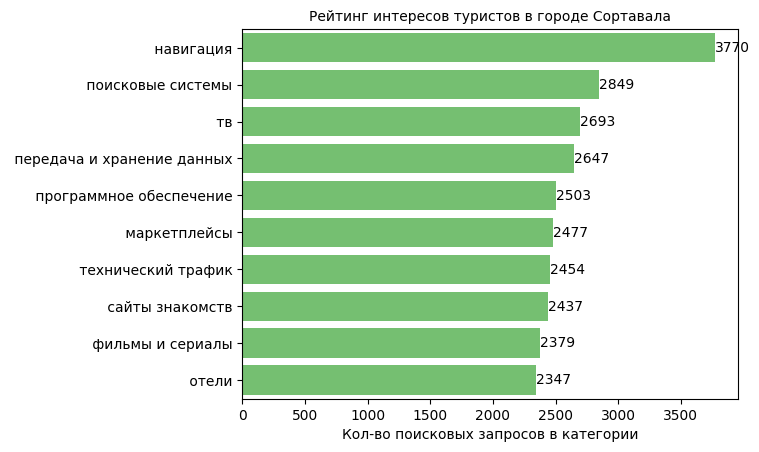

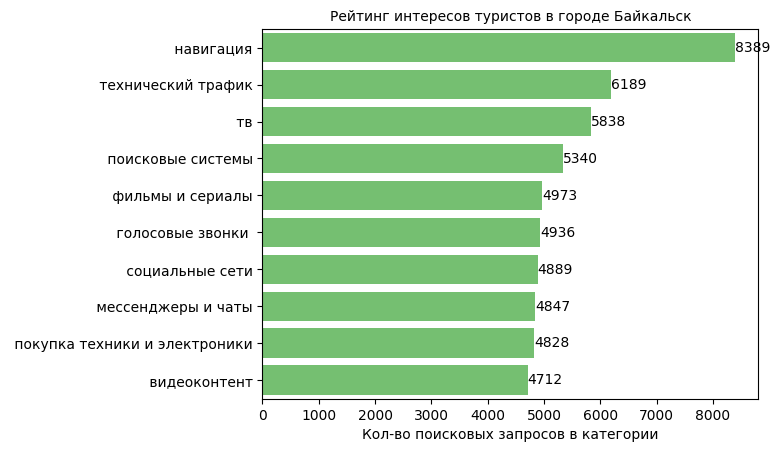

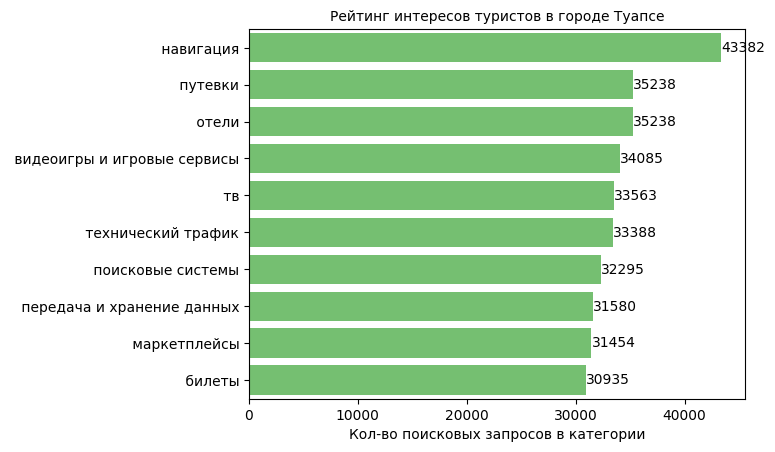

In [ ]:
# По выбранным городам только за 2022 год (данных за 21 нет)
#d_2022["Сортавала"]['interests'].value_counts().head(40)    # если без дробления
cities_to_check = ["Сортавала", "Байкальск", "Туапсе"]

for city in cities_to_check: 
  df = real_tourists_2022[city]
  real_users = df.loc[df['days'].between(5, 20)].reset_index().sort_values("days", ascending=False)
  col_list = real_users.interests.dropna().to_numpy()
  new = []
  for i in range(len(col_list)):
    target = col_list[i][1:-1].split(',')
    for _ in target:
      new.append(_.lower())
  data = pd.Series(new).value_counts().nlargest(10)
  df = pd.DataFrame({ 'interests': data.index, 'values': data.values })
  #df
  df.to_csv(f'{data_dir}Рейтинг интересов туристов в городе {city}.csv')
  sns.set_color_codes("muted")
  ax = sns.barplot(x = data.values, y = data.index, orient='h', color="g")
  ax.bar_label(ax.containers[0])
  #add plot title
  plt.title(f'Рейтинг интересов туристов в городе {city}', fontsize=10)
  #add axis labels
  plt.xlabel('Кол-во поисковых запросов в категории')
  plt.savefig(f"{data_dir}Рейтинг интересов туристов в городе {city}.jpg")
  plt.show()

# Половозрастная структура по выбранным городам 
-----

In [ ]:
# поменять год на 2022 или 2022
for city in cities_2022: 
  df = real_tourists_2022[city]     
  real_users = df.loc[df['days'].between(5, 20)].reset_index().sort_values("days", ascending=False)
  gender_age = real_users.loc[real_users['age'].between(14, 75)]
  gender_age = gender_age[['gender', 'age']]
  gender_age = gender_age.groupby(["gender"]).agg({"gender": np.sum, "age": np.mean})
  gender_age['age'] = gender_age['age'].astype(int)
  gender_age.to_csv(f'{data_dir}Половозрастная структура в городе {city} за 2022.csv')   
  gender_age

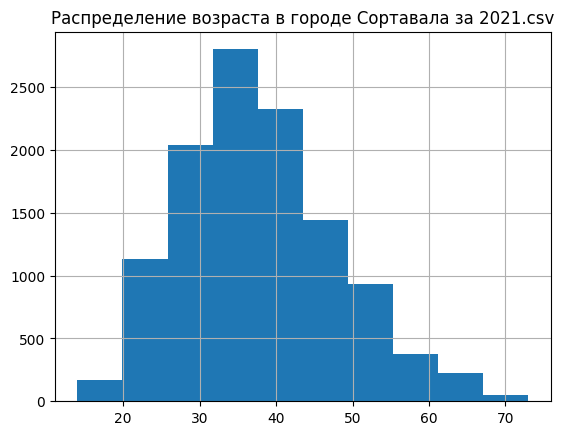

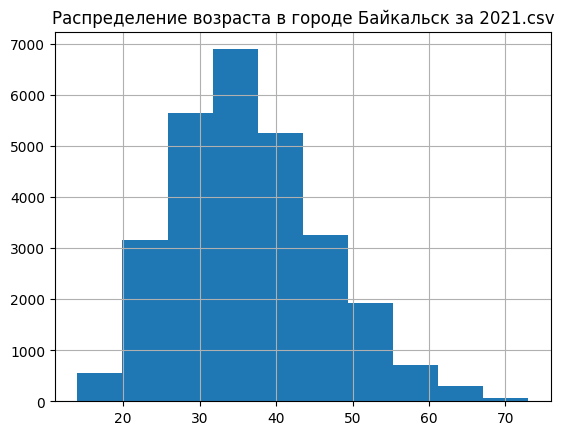

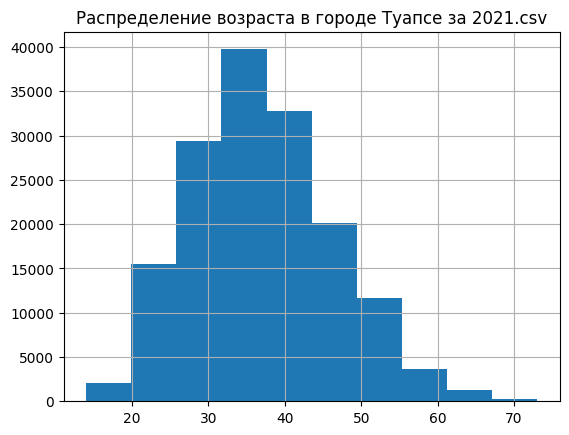

In [ ]:
# поменять год на 2021 или 2021
for city in cities_to_check: 
  df = real_tourists_2021[city]               
  real_users = df.loc[df['days'].between(5, 20)].reset_index().sort_values("days", ascending=False)
  gender_age = real_users.loc[real_users['age'].between(14, 75)]
  gender_age.hist(column='age')
  plt.title(f'Распределение возраста в городе {city} за 2021.csv')                           
  plt.savefig(f'{data_dir}Распределение возраста в городе {city} за 2021.jpg')

In [ ]:
count_home_region_2021 = {}
count_home_region_2022 = {}

def count_home_region(cities, year, d):  
  for i in cities:
    df = d[i]

    count_home_region = df['home_region'].value_counts().head(20)
    count_home_region = pd.DataFrame(count_home_region)
    count_home_region['city'] = f'{i}'

    if year == '2021':
      count_home_region_2021[i] = count_home_region
    else:
      count_home_region_2022[i] = count_home_region

count_home_region(cities_2021, "2021", real_tourists_2021)
count_home_region(cities_2022, "2022", real_tourists_2022)

In [ ]:
# поменять год на 2021 или 2021
full_home_region = pd.concat(count_home_region_2021.values(), ignore_index=False)
full_home_region.to_csv(f'{data_dir} Распределение по домашним регионам за 2021.csv')

In [ ]:
traffic_2021 = {}
traffic_2022 = {}

def traffic(cities, year, d):  
  for i in cities:
    df = d[i]

    df[['mou', 'mou_out', 'dou']] = df[['mou', 'mou_out', 'dou']].astype(float)
    df[['mou', 'mou_out', 'dou']] = df[['mou', 'mou_out', 'dou']].fillna(df[['mou', 'mou_out', 'dou']].mean())
    df = df[['mou', 'mou_out', 'dou']].mean().astype(int)
    df = pd.DataFrame(df)
    df = df.T
    df = df.rename({0: f'{i}'})

    if year == '2021':
      traffic_2021[i] = df
    else:
      traffic_2022[i] = df

traffic(cities_2021, "2021", real_tourists_2021)
traffic(cities_2022, "2022", real_tourists_2022)

In [ ]:
# поменять год на 2022 или 2022
full_traffic = pd.concat(traffic_2021.values(), ignore_index=False)
full_traffic.to_csv(f'{data_dir} mou-mou_out-dou за 2021.csv')